In [1]:

import pandas as pd

data2 = pd.read_csv(r'C:\Users\bahad\PycharmProjects\kpmakale\converted_csv_files\H_001_231215_B27B140814231215S.csv')
print(data2)

         2019
0        2077
1        2136
2        2101
3        2065
4        2144
...       ...
3054394  2004
3054395  2004
3054396  2004
3054397  2004
3054398  2004

[3054399 rows x 1 columns]


In [3]:
import os
import pandas as pd

# Define the directory containing the CSV files
directory = r'C:\Users\bahad\PycharmProjects\kpmakale\converted_csv_files'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Iterate over each CSV file and print the number of rows if less than 2 million
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    data = pd.read_csv(file_path)
    if len(data) < 2000000:
        print(f'{csv_file}: {len(data)} rows')

H_018_214635_B27B140805214635S.csv: 1411599 rows
H_021_231158_B15B140808231158S.csv: 787399 rows
N_062_235328_B15B140712235328S.csv: 307599 rows


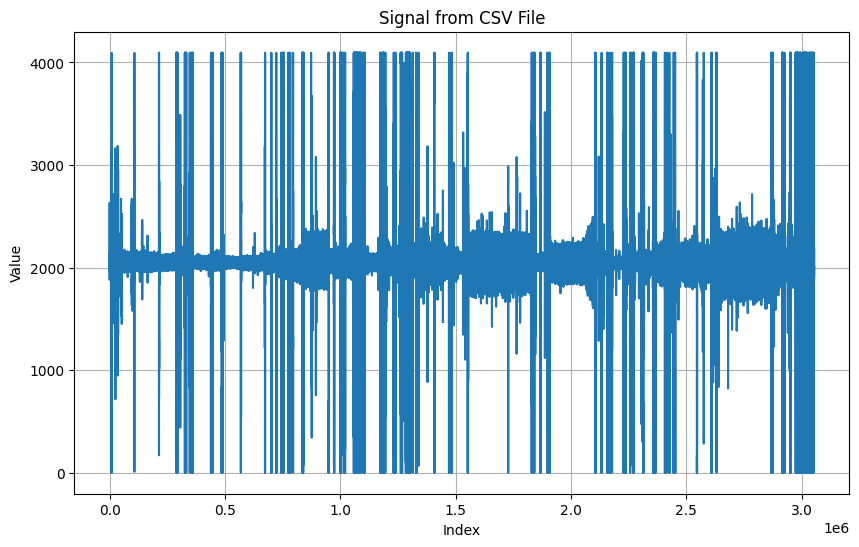

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the first CSV file
file_path = r'C:\Users\bahad\PycharmProjects\kpmakale\converted_csv_files\H_001_231215_B27B140814231215S.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(data.iloc[:, 0])
plt.title('Signal from CSV File')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [5]:
import os
import pandas as pd
from scipy.signal import butter, filtfilt

# Define the directory containing the CSV files
directory = r'C:\Users\bahad\PycharmProjects\kpmakale\converted_csv_files'
# Define the directory to save filtered CSV files
filtered_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files'

# Create the filtered directory if it doesn't exist
if not os.path.exists(filtered_directory):
    os.makedirs(filtered_directory)

# Define a function for high-pass filter
def high_pass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define a function for low-pass filter
def low_pass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the filters
fs = 1000  # Sample rate (Hz), adjust according to your data
low_cutoff = 50  # Low-pass filter cutoff frequency (Hz)
high_cutoff = 1  # High-pass filter cutoff frequency (Hz)

# Iterate over each CSV file
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    data = pd.read_csv(file_path)
    
    # Apply high-pass filter
    data_high_passed = data.apply(lambda x: high_pass_filter(x, high_cutoff, fs) if x.name != 'time' else x)
    
    # Apply low-pass filter
    data_low_passed = data_high_passed.apply(lambda x: low_pass_filter(x, low_cutoff, fs) if x.name != 'time' else x)
    
    # Save the filtered data to the new directory
    filtered_file_path = os.path.join(filtered_directory, 'filtered_' + csv_file)
    data_low_passed.to_csv(filtered_file_path, index=False)

    # Optionally, print the filtered data for checking
    print(f"Filtered data saved to {filtered_file_path}")
    


Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_001_231215_B27B140814231215S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_002_232917_B27B140814231215S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_003_223100_B27B140815223100S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_004_232630_B15B140818232630S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_005_232349_B15B140802232349S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_006_230154_B15B140821230154S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_007_232948_B27B140825232948S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_csv_files\filtered_H_008_000934_B27B1408310009

In [6]:
import os
import pandas as pd

# Define the directory containing the CSV files
directory = r'C:\Users\bahad\PycharmProjects\kpmakale\converted_csv_files'
# Define the directory to save integer-converted CSV files
integer_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\integer_csv_files'

# Create the integer directory if it doesn't exist
if not os.path.exists(integer_directory):
    os.makedirs(integer_directory)

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Iterate over each CSV file
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    data = pd.read_csv(file_path)
    
    # Convert all columns to integer, handle potential NaN values
    data_int = data.fillna(0).astype(int)
    
    # Save the integer-converted data to the new directory
    integer_file_path = os.path.join(integer_directory, 'integer_' + csv_file)
    data_int.to_csv(integer_file_path, index=False)
    
    # Optionally, print the integer-converted data for checking
    print(f"Integer-converted data saved to {integer_file_path}")
    print(data_int)


Integer-converted data saved to C:\Users\bahad\PycharmProjects\kpmakale\integer_csv_files\integer_H_001_231215_B27B140814231215S.csv
         2019
0        2077
1        2136
2        2101
3        2065
4        2144
...       ...
3054394  2004
3054395  2004
3054396  2004
3054397  2004
3054398  2004

[3054399 rows x 1 columns]
Integer-converted data saved to C:\Users\bahad\PycharmProjects\kpmakale\integer_csv_files\integer_H_002_232917_B27B140814231215S.csv
         2019
0        2077
1        2136
2        2101
3        2065
4        2144
...       ...
3054394  2004
3054395  2004
3054396  2004
3054397  2004
3054398  2004

[3054399 rows x 1 columns]
Integer-converted data saved to C:\Users\bahad\PycharmProjects\kpmakale\integer_csv_files\integer_H_003_223100_B27B140815223100S.csv
          784
0         471
1         159
2         361
3         564
4         663
...       ...
3624194  1903
3624195  1903
3624196  1903
3624197  1903
3624198  1903

[3624199 rows x 1 columns]
Integer-conve

In [7]:
import os
import pandas as pd

# Define the directory containing the integer CSV files
integer_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\integer_csv_files'
# Define the directory to save filtered CSV files
filtered_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files'

# Create the filtered directory if it doesn't exist
if not os.path.exists(filtered_directory):
    os.makedirs(filtered_directory)

# List all CSV files in the integer directory
csv_files = [f for f in os.listdir(integer_directory) if f.endswith('.csv')]

# Define a function to calculate the threshold using standard deviation
def calculate_threshold(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std_dev = data.std()
    # Define threshold as mean + 2*std_dev
    threshold = mean + 2 * std_dev
    return threshold

# Iterate over each CSV file in the integer directory
for csv_file in csv_files:
    file_path = os.path.join(integer_directory, csv_file)
    data = pd.read_csv(file_path)
    
    # Apply peak filtering to each numeric column
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            threshold = calculate_threshold(data[column])
            data = data[data[column] <= threshold]
    
    # Save the filtered data to the new directory
    filtered_file_path = os.path.join(filtered_directory, 'filtered_' + csv_file)
    data.to_csv(filtered_file_path, index=False)
    
    # Optionally, print the filtered data for checking
    print(f"Filtered data saved to {filtered_file_path}")



Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_001_231215_B27B140814231215S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_002_232917_B27B140814231215S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_003_223100_B27B140815223100S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_004_232630_B15B140818232630S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_005_232349_B15B140802232349S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_006_230154_B15B140821230154S.csv
Filtered data saved to C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files\filtered_integer_H_007_232948_B27B140825232948S.csv
Filtered data saved to C:\U

In [8]:
import os
import pandas as pd
from scipy.signal import butter, filtfilt

# Define the directory containing the filtered peak CSV files
filtered_peak_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\filtered_peak_csv_files'
# Define the directory to save baseline-corrected CSV files
corrected_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files'

# Create the corrected directory if it doesn't exist
if not os.path.exists(corrected_directory):
    os.makedirs(corrected_directory)

# Define a function for high-pass filter
def high_pass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the high-pass filter
fs = 1000  # Sample rate (Hz), adjust according to your data
cutoff = 0.5  # High-pass filter cutoff frequency (Hz), adjust based on your needs

# List all CSV files in the filtered peak directory
csv_files = [f for f in os.listdir(filtered_peak_directory) if f.endswith('.csv')]

# Iterate over each CSV file in the filtered peak directory
for csv_file in csv_files:
    file_path = os.path.join(filtered_peak_directory, csv_file)
    data = pd.read_csv(file_path)
    
    # Apply high-pass filter to each numeric column
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            data[column] = high_pass_filter(data[column], cutoff, fs)
    
    # Save the baseline-corrected data to the new directory
    corrected_file_path = os.path.join(corrected_directory, 'corrected_' + csv_file)
    data.to_csv(corrected_file_path, index=False)
    
    # Optionally, print the baseline-corrected data for checking
    print(f"Baseline-corrected data saved to {corrected_file_path}")
    


Baseline-corrected data saved to C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files\corrected_filtered_integer_H_001_231215_B27B140814231215S.csv
Baseline-corrected data saved to C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files\corrected_filtered_integer_H_002_232917_B27B140814231215S.csv
Baseline-corrected data saved to C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files\corrected_filtered_integer_H_003_223100_B27B140815223100S.csv
Baseline-corrected data saved to C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files\corrected_filtered_integer_H_004_232630_B15B140818232630S.csv
Baseline-corrected data saved to C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files\corrected_filtered_integer_H_005_232349_B15B140802232349S.csv
Baseline-corrected data saved to C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files\corrected_filtered_integer_H_006_230154_B15B140821230154S.csv
Baseline-correct

In [9]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the directory containing the corrected baseline CSV files
corrected_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\corrected_baseline_csv_files'
# Define the directory to save normalized CSV files
normalized_directory = r'C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files'

# Create the normalized directory if it doesn't exist
if not os.path.exists(normalized_directory):
    os.makedirs(normalized_directory)

# List all CSV files in the corrected baseline directory
csv_files = [f for f in os.listdir(corrected_directory) if f.endswith('.csv')]

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Iterate over each CSV file in the corrected baseline directory
for csv_file in csv_files:
    file_path = os.path.join(corrected_directory, csv_file)
    data = pd.read_csv(file_path)
    
    # Apply normalization to each numeric column
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            # Reshape the column to a 2D array for the scaler
            data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    
    # Save the normalized data to the new directory
    normalized_file_path = os.path.join(normalized_directory, 'normalized_' + csv_file)
    data.to_csv(normalized_file_path, index=False)
    
    # Optionally, print the normalized data for checking
    print(f"Normalized data saved to {normalized_file_path}")
    


Normalized data saved to C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_001_231215_B27B140814231215S.csv
Normalized data saved to C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_002_232917_B27B140814231215S.csv
Normalized data saved to C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_003_223100_B27B140815223100S.csv
Normalized data saved to C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_004_232630_B15B140818232630S.csv
Normalized data saved to C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_005_232349_B15B140802232349S.csv
Normalized data saved to C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_006_230154_B15B140821230154S.csv
Normalized data saved to C:\Users\bahad\Pychar

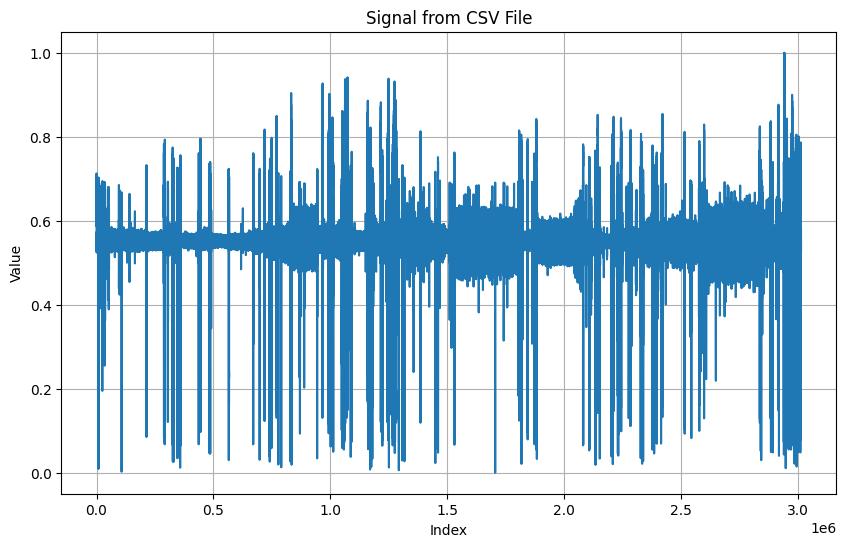

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the first CSV file
file_path = r'C:\Users\bahad\PycharmProjects\kpmakale\normalized_csv_files\normalized_corrected_filtered_integer_H_001_231215_B27B140814231215S.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(data.iloc[:, 0])
plt.title('Signal from CSV File')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [2]:
import os
import pandas as pd

# Dosya yolları
input_folder = 'normalized_csv_files'
output_folder = 'dataset_final'

# Eğer output_folder yoksa oluştur
os.makedirs(output_folder, exist_ok=True)

# Klasördeki tüm CSV dosyalarını işle
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        # Dosyayı oku
        filepath = os.path.join(input_folder, filename)
        df = pd.read_csv(filepath, header=None)
        
        # Her bir değeri 5 ondalık haneye yuvarla
        df = df.applymap(lambda x: f"{x:.4f}")
        
        # Yeni dosya adını oluştur
        output_path = os.path.join(output_folder, filename)
        
        # Düzenlenmiş veriyi kaydet
        df.to_csv(output_path, index=False, header=False)

print("İşlem tamamlandı, dosyalar dataset_final klasörüne kaydedildi.")


C:\Users\bahad\AppData\Local\Temp\ipykernel_4952\2936571676.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x:.4f}")
C:\Users\bahad\AppData\Local\Temp\ipykernel_4952\2936571676.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x:.4f}")
C:\Users\bahad\AppData\Local\Temp\ipykernel_4952\2936571676.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x:.4f}")
C:\Users\bahad\AppData\Local\Temp\ipykernel_4952\2936571676.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x:.4f}")
C:\Users\bahad\AppData\Local\Temp\ipykernel_4952\2936571676.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x:.4f}")
C:\Users\bahad\AppData\Local\Temp\ipykernel_4952\2

İşlem tamamlandı, dosyalar dataset_final klasörüne kaydedildi.


In [3]:
import os
import pandas as pd

# Dosya yolu
folder = 'dataset_final'

# Klasördeki tüm CSV dosyalarını işle
for filename in os.listdir(folder):
    if filename.endswith('.csv'):
        # Dosya yolunu oluştur
        filepath = os.path.join(folder, filename)
        
        # Dosyayı oku, ilk satırı atla
        df = pd.read_csv(filepath, skiprows=1, header=None)
        
        # Düzenlenmiş veriyi tekrar kaydet
        df.to_csv(filepath, index=False, header=False)

print("İşlem tamamlandı, tüm dosyalardaki ilk satırlar silindi.")


İşlem tamamlandı, tüm dosyalardaki ilk satırlar silindi.


In [2]:
import os

# Klasör yolları
input_folder_path = 'dataset_final'
output_folder_path = 'dataset_final2'

# Yeni klasörü oluştur
os.makedirs(output_folder_path, exist_ok=True)

# Dosya adlarını al
file_names = [file for file in os.listdir(input_folder_path) if os.path.isfile(os.path.join(input_folder_path, file))]

# Satır sayıları listesi
line_counts = []

# Tüm dosyaları oku ve satır sayılarını hesapla
for file_name in file_names:
    file_path = os.path.join(input_folder_path, file_name)
    with open(file_path, 'r') as file:
        line_count = sum(1 for _ in file)
        line_counts.append(line_count)

# En kısa satır sayısını belirle
min_lines = min(line_counts)

# Dosyaları en kısa satır sayısına göre kesip yeni klasöre yazma
for file_name in file_names:
    input_file_path = os.path.join(input_folder_path, file_name)
    output_file_path = os.path.join(output_folder_path, file_name)
    
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
        for i, line in enumerate(input_file):
            if i < min_lines:
                output_file.write(line)
            else:
                break

print(f"Tüm dosyalar {min_lines} satır uzunluğuna kesildi ve {output_folder_path} klasörüne kaydedildi.")


Tüm dosyalar 303914 satır uzunluğuna kesildi ve dataset_final2 klasörüne kaydedildi.
